In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.backends.backend_pdf
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_palette("bright", color_codes=True)

/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


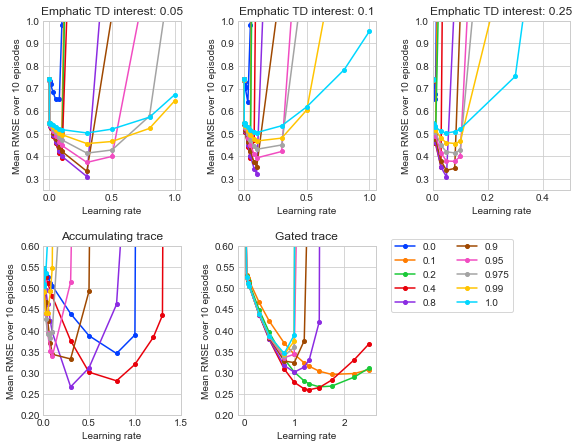

In [79]:
# 19-State Random Walk

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
intrst = [0.05, 0.1, 0.25]
lamb = [0.0, 0.1, 0.2, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
env = "randomWalk"
epi = 100
ci = 0.
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_Ychain_hp_tuning.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(8, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [3, 2.5, 2.2, 1.75, 1.5, 1.3, 1.2, 1.0, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05,\
              0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003, 0.0001, 0.00005]
              

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "o", "etrace": "o", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for t in types:
    if t == "etd":
        for itrst in intrst:
            for lam in lamb:
                lr_list = []
                avg_error_list = []
                std_error_list = []
                for lr in learn_rate:
                    seed_error = []
                    for se in seed:
                        flag = False
                        try:
                            with open("../results_randomWalk/"+t+"_env_"+env+"_intrst_"+str(itrst)+"_lamb_"+str(lam)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                                tmpp = list(pickle.load(f))
                                tmp_avg = np.mean(np.sqrt(np.array(tmpp)))
                                if tmp_avg > 10 or np.isnan(tmp_avg):
                                    tmp_avg = 10
                                    flag = True
                                seed_error.append(tmp_avg)
                        except:
                            #print(t+"_env_"+env+"_intrst_"+str(itrst)+"_lamb_"+str(lam)+"_lr_"+str(lr)+"_seed_"+str(se))
                            #pass
                            continue

                    mean = np.mean(np.array(seed_error))
                    avg_error_list.append(mean)
                    if flag:
                        std_error_list.append(np.zeros_like(mean))
                    else:
                        std_error_list.append(np.std(np.array(seed_error)))
                    lr_list.append(lr)

                ax[row_plt, col_plt].plot(lr_list, avg_error_list, marker=marker[t], markersize=4)
                ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                          np.array(avg_error_list)-ci*np.array(std_error_list), alpha=0.3)
                #ax[col_plt].set(xscale="log")
                ax[row_plt, col_plt].set_title(name[t]+" interest: "+str(itrst))
                ax[row_plt, col_plt].set_ylim(0.25,1.0)
                if itrst == 0.25:
                    ax[row_plt, col_plt].set_xlim(0,0.5)
                ax[row_plt, col_plt].set_xlabel("Learning rate")
                ax[row_plt, col_plt].set_ylabel("Mean RMSE over 10 episodes")
            col_plt += 1
            if col_plt == 3:
                row_plt = 1
                col_plt = 0
                
    else:
        for lam in lamb:
            lr_list = []
            avg_error_list = []
            std_error_list = []
            for lr in learn_rate:
                seed_error = []
                for se in seed:
                    flag = False
                    try:
                        with open("../results_randomWalk/"+t+"_env_"+env+"_lamb_"+str(lam)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                            tmpp = list(pickle.load(f))
                            tmp_avg = np.mean(np.sqrt(np.array(tmpp)))
                            if tmp_avg > 10 or np.isnan(tmp_avg):
                                tmp_avg = 10
                                flag = True
                            seed_error.append(tmp_avg)
                    except:
                        #print(t+"_lamb_"+str(lamb)+"_lr_"+str(lr)+"_seed_"+str(se))
                        #pass
                        continue

                mean = np.mean(np.array(seed_error))
                avg_error_list.append(mean)
                if flag:
                    std_error_list.append(np.zeros_like(mean))
                else:
                    std_error_list.append(np.std(np.array(seed_error)))
                lr_list.append(lr)

            ax[row_plt, col_plt].plot(lr_list, avg_error_list, marker=marker[t], markersize=4)
            ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                      np.array(avg_error_list)-ci*np.array(std_error_list), alpha=0.3)
            #ax[col_plt].set(xscale="log")
            ax[row_plt, col_plt].set_title(name[t])
            ax[row_plt, col_plt].set_ylim(0.2,0.6)
            if t == "etrace":
                ax[row_plt, col_plt].set_xlim(0,1.5)
            ax[row_plt, col_plt].set_xlabel("Learning rate")
            ax[row_plt, col_plt].set_ylabel("Mean RMSE over 10 episodes")
        
        col_plt += 1
        if col_plt == 3:
            row_plt = 1
            col_plt = 0

fig.legend(lamb, ncol=2, loc="right",bbox_to_anchor=(0.5, 0., 0.4, 0.8), frameon=True) # bbox_to_anchor=(0.33, 0.15, 0.4, 0.)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

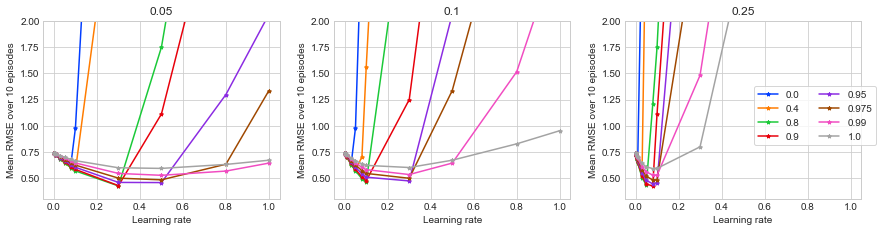

In [62]:
# 19-State Random Walk

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
lamb = [0.0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
env = "randomWalk"
epi = 100
ci = 0.
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_Ychain_hp_tuning.pdf")
types = ["etd"]
intrst = [0.05, 0.1, 0.25]

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [1.0, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05,\
              0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003, 0.0001, 0.00005]
              

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "o", "etrace": "o", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for t in types:
    for itrst in intrst:
        for lam in lamb:
            lr_list = []
            avg_error_list = []
            std_error_list = []
            for lr in learn_rate:
                seed_error = []
                for se in seed:
                    flag = False
                    try:
                        with open("../results_randomWalk/"+t+"_env_"+env+"_intrst_"+str(itrst)+"_lamb_"+str(lam)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                            tmpp = list(pickle.load(f))
                            tmp_avg = np.mean(np.sqrt(np.array(tmpp)))
                            if tmp_avg > 10 or np.isnan(tmp_avg):
                                tmp_avg = 10
                                flag = True
                            seed_error.append(tmp_avg)
                    except:
                        print(t+"_env_"+env+"_intrst_"+str(itrst)+"_lamb_"+str(lam)+"_lr_"+str(lr)+"_seed_"+str(se))
                        #pass

                mean = np.mean(np.array(seed_error))
                avg_error_list.append(mean)
                if flag:
                    std_error_list.append(np.zeros_like(mean))
                else:
                    std_error_list.append(np.std(np.array(seed_error)))
                lr_list.append(lr)

            ax[col_plt].plot(lr_list, avg_error_list, marker=marker[t], markersize=4)
            ax[col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                      np.array(avg_error_list)-ci*np.array(std_error_list), alpha=0.3)
            #ax[col_plt].set(xscale="log")
            ax[col_plt].set_title(itrst)
            ax[col_plt].set_ylim(0.3,2)
            ax[col_plt].set_xlabel("Learning rate")
            ax[col_plt].set_ylabel("Mean RMSE over 10 episodes")

        col_plt += 1
        if col_plt == 3:
            row_plt = 1
            col_plt = 0

fig.legend(lamb, ncol=2, loc="right", frameon=True)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

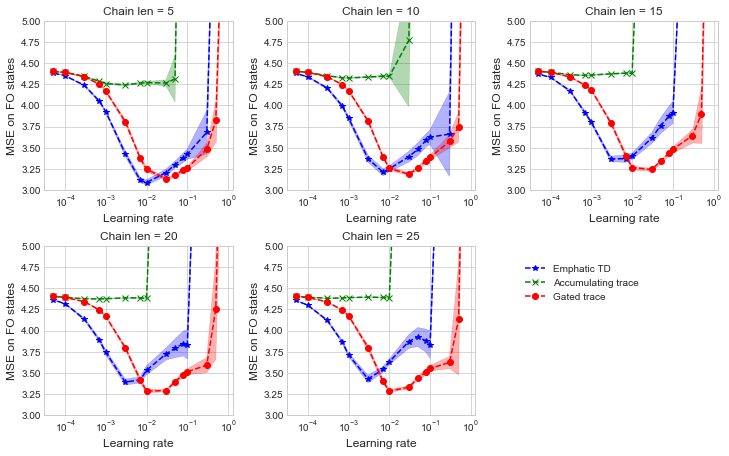

In [128]:
# Elevator

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [5, 10, 15, 20, 25]
env = "elevator"
epi = 200
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_elevator_hp_tuning.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [0.8, 0.5, 0.3, 0.1, 0.08, 0.05,\
              0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003, 0.0001, 0.00005]
              

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "*", "etrace": "x", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr_list = []
        avg_error_list = []
        std_error_list = []
        for lr in learn_rate:
            seed_error = []
            for se in seed:
                flag = False
                try:
                    with open("../results_elevator/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        tmp_avg = np.mean(np.array(tmpp[-5:]))
                        if tmp_avg > 10 or np.isnan(tmp_avg):
                            tmp_avg = 10
                            flag = True
                        seed_error.append(tmp_avg)
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))
            
            mean = np.mean(np.array(seed_error))
            avg_error_list.append(mean)
            if flag:
                std_error_list.append(np.zeros_like(mean))
            else:
                std_error_list.append(np.std(np.array(seed_error)))
            lr_list.append(lr)
            
        ax[row_plt, col_plt].plot(lr_list, avg_error_list, linestyle='dashed', marker=marker[t],\
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                  np.array(avg_error_list)-ci*np.array(std_error_list), color=colors[t], alpha=0.3)
        ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l), fontsize=12)
        #ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        ax[row_plt, col_plt].set_ylim(3,5)
        ax[row_plt, col_plt].set_xlabel("Learning rate")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.4, 0.8))#loc="lower center", bbox_to_anchor=(0.4, 0., 0.5, -5), ncol=3)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

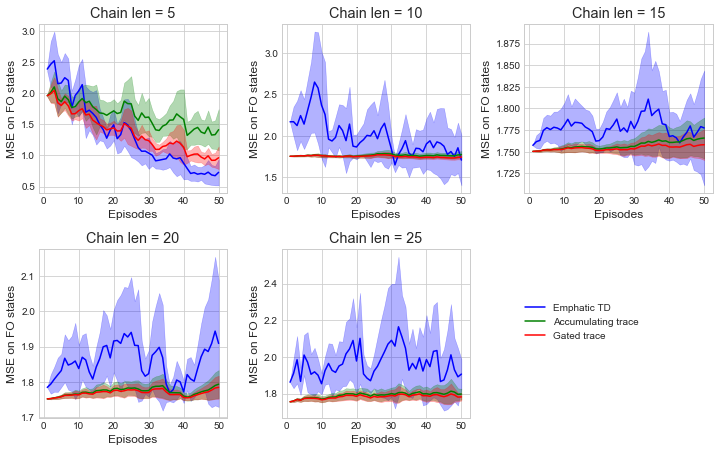

In [80]:
plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [5, 10, 15, 20, 25]
env = "YChain"
epi = 50
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("best_Ychain_perf.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

all_lr = {"etd":{5:0.007, 10:0.001, 15:0.00005, 20:0.00005, 25:0.00005},"etrace":{5:0.01, 10:0.0003, 15:0.00005, 20:0.00005, 25:0.00005},"gated_trace":{5:0.01, 10:0.0003, 15:0.00005, 20:0.00005, 25:0.00005}}

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "*", "etrace": "x", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr = all_lr[t][c_l]
        seed_error = []
        for se in seed:
            try:
                with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    #tmp_avg = np.mean(np.array(tmpp[-5:]))
                    #if tmp_avg > 100 or np.isnan(tmp_avg):
                        #tmp_avg = 100
                    seed_error.append(tmpp)
            except:
                print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))
        
        avg_error = np.mean(np.array(seed_error), axis=0)
        std_error = np.std(np.array(seed_error), axis=0)
            
        ax[row_plt, col_plt].plot(range(1,epi+1), avg_error,
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(range(1,epi+1), avg_error+ci*std_error,\
                                  avg_error-ci*std_error, color=colors[t], alpha=0.3)
        #ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l))
        ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        #ax[row_plt, col_plt].set_ylim(0.5,5)
        ax[row_plt, col_plt].set_xlabel("Episodes")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.4, 0.6))
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

In [81]:
np.random.randn(3)

array([ 0.67476799, -0.99212014, -0.26984046])